In [ ]:
from sklearn.base import BaseEstimator
from scipy.linalg import inv
import numpy as np

class LinearRegressionVersion1(BaseEstimator):

	"""Imitation of LinearRegression estimator from sklearn.
	It doesn't take any parameters or hyperparameters. 
	This estimator will use full-batch, which means that it uses
	all the data points and makes it slow to process a lot of data 
	points.

	Parameters: 
	----------

	Attributes:
	----------


	"""


	def __init__(self):
		pass
  		

	def fit(self, X, y):	

		X = np.c_[np.ones(X.shape[0]), X]
		self.weights = inv(X.T.dot(X)).dot(X.T).dot(y)
		self.coef_ = self.weights[1:]
		self.intercept_ = self.weights[0]
		return self

	def predict(self, X):

		X = np.c_[np.ones(X.shape[0]), X]
		return X.dot(self.weights)





In [ ]:
import pandas as pd

In [ ]:
train = pd.read_csv('train.csv')

In [4]:
train.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [ ]:
X = train.iloc[:, 1:-1]
y = train.iloc[:, -1]

In [6]:
X.shape

(333, 13)

In [7]:
train.shape

(333, 15)

In [ ]:
y_mean = train['medv'].mean()

In [9]:
print(y_mean)

22.768768768768783


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
regressor = LinearRegressionVersion1().fit(X_train, y_train)

In [ ]:
y_pred = regressor.predict(X_test)

In [13]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.7284999551579722

In [14]:
regressor.weights

array([ 3.82065887e+01, -7.70864805e-02,  5.96625274e-02, -1.47542413e-02,
        4.19669939e+00, -1.68647421e+01,  3.55900501e+00, -1.25628035e-02,
       -1.81432814e+00,  4.07576895e-01, -1.56437701e-02, -7.70781295e-01,
        7.52281292e-03, -5.81243533e-01])

In [ ]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

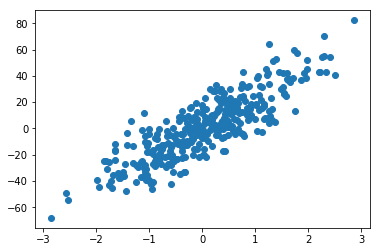

In [23]:
X_scatter, y_scatter = make_regression(n_samples=350, n_features=1, bias=0.5, noise=12)
plt.scatter(X_scatter, y_scatter)

In [ ]:
regressor = LinearRegressionVersion1().fit(X_scatter, y_scatter)

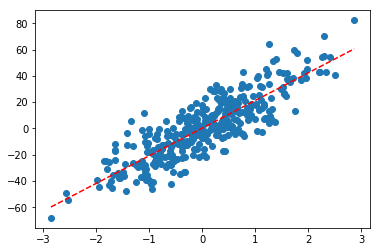

In [25]:
line = np.linspace(X_scatter.min(), X_scatter.max())
plt.scatter(X_scatter, y_scatter)
plt.plot(line, regressor.predict(line), 'r--')

In [26]:
regressor.coef_

array([21.0038832])

In [27]:
regressor.intercept_

0.20758705177578649